<a href="https://colab.research.google.com/github/rodreras/geopy_minicurso/blob/main/notebooks/3_geologic_drillhole_workflow/PythonGeo_Geologic_Drillhole_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fluxo de Trabalho Geológico com Python

Você é Geólogo na Mineradora *OreExtraction Inc.* e recebeu uma série de dados de sondagens para fazer análises.

Como o dono da empresa é pão duro e adora comunidades open-source, ele não compra nenhuma licença de softwares, ou seja, você precisa fazer toda a análise em Python.

Para isso, você precisará: 

a) Carregar, verificar e limpar os dados com `Pandas` e `Numpy`

b) Plotar os dados em um mapa e ver sua localização com as bibliotecas `Geopandas`

c) O perfil das sondagens com `Striplog`

d) A composição química com `Pyrolite`

e) Estereograma das atitudes com `mplstereo`

f) Plotar em 3D com `Sondaje3D`


**Importante** 

Algumas bibliotecas que utilizaremos não são pré instaladas no Google Collab, por isso, inicialmente, realizaremos o download de todas elas com o comando exemplo: `!pip install [biblioteca]`


In [ ]:
#baixando as bibliotecas que utilizaremos
!pip install pip --upgrade
!pip install contextily
#!pip install matplotlib
!pip install striplog
!pip install geopandas
!pip install folium
!pip install pyrolite
!pip install mplstereonet
!pip install tqdm
#!pip install plotly
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 4.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 31.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 4.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 79.4 MB/s eta 0:00:00
     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)


In [ ]:
#importando bibliotecas base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importando bibliotecas do projeto

  #analise espacial
import geopandas as gpd
import folium
import contextily as cx

  # análise geoquimica
import pyrolite as py

  # análise dos poços
from striplog import Striplog, Legend, Lexicon, Interval, Component

    #criando um fluxo diferente para importar as funções
    #do arquivo sondaje3d.py
import sys
import os

py_file_location = "/content/drive/My Drive"
sys.path.append(os.path.abspath(py_file_location))
from sondaje3d import DrillData

print('Todas as bibliotecas foram carregadas')

Todas as bibliotecas foram carregadas


# a) Importando, Verificando e Limpando os dados

Primeiro e mais importante passo!

In [ ]:
#definindo o caminho das pastas
path = '/content/drive/MyDrive/minicurso_python_geologia/Notebooks/12_11/Workflow_Geologico/Dados/'

#importando as 3 tabelas
assay = pd.read_csv(path+'Drillholes_Assay.csv', sep = ';', decimal = ',')
collar = pd.read_csv(path+'Drillholes_Collar.csv', sep = ';', decimal = ',')
geology = pd.read_csv(path+'Drillholes_Geology.csv', sep = ';', decimal = ',')

print('Todas as tabelas foram importadas!')

Todas as tabelas foram importadas!


In [ ]:
#verificando os dados das tabelas
display(assay.head())

display(assay.columns)

display(assay.info())

,sample_id,hole_id,depth_from,depth_to,litho_reclass,SiO2_pct,TiO2_pct,Al2O3_pct,Cr2O3_pct,Fe_pct,...,Pb_pct,S_pct,Sn_pct,Sr_pct,V_pct,Zn_pct,Zr_pct,total_pct,FeO_pct,mag_pct
0,AMOSTRA_1001,NaN,NaN,NaN,NaN,97.4,0.03,0.09,0.004,0.62,...,NaN,0.003,0.0001,0.001,0.001,NaN,NaN,98.53,0.72,1.34
1,AMOSTRA_1002,NaN,NaN,NaN,NaN,54.2,0.02,0.49,NaN,30.18,...,0.003,NaN,0.0001,NaN,0.002,0.003,0.002,100.40,1.39,NaN
2,AMOSTRA_1003,DrillHole_0005,0.00,1.50,NaN,56.8,0.20,6.66,0.009,20.28,...,NaN,0.005,0.0001,0.003,0.003,0.012,0.007,100.10,2.36,6.15
3,AMOSTRA_1004,DrillHole_0005,1.50,2.75,Rocha Calcissilicatica Nao Magnetitoetica,47.5,0.88,13.25,0.037,9.15,...,0.004,0.010,0.0001,0.019,0.010,0.023,0.027,100.10,0.79,0.63
4,AMOSTRA_1005,DrillHole_0005,2.75,4.00,Rocha Calcissilicatica Nao Magnetitoetica,63.1,0.36,4.99,0.020,11.32,...,0.008,0.012,0.0010,0.010,0.006,0.021,0.011,100.60,2.33,1.16


Index(['sample_id', 'hole_id', 'depth_from', 'depth_to', 'litho_reclass',
       'SiO2_pct', 'TiO2_pct', 'Al2O3_pct', 'Cr2O3_pct', 'Fe_pct', 'Mn_pct',
       'CaO_pct', 'MgO_pct', 'Na2O_pct', 'K2O_pct', 'BaO_pct', 'P_pct',
       'loi_pct', 'As_pct', 'Cl_pct', 'Co_pct', 'Cu_pct', 'Ni_pct', 'Pb_pct',
       'S_pct', 'Sn_pct', 'Sr_pct', 'V_pct', 'Zn_pct', 'Zr_pct', 'total_pct',
       'FeO_pct', 'mag_pct'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6277 entries, 0 to 6276
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sample_id      6277 non-null   object 
 1   hole_id        6035 non-null   object 
 2   depth_from     5134 non-null   float64
 3   depth_to       5134 non-null   float64
 4   litho_reclass  1247 non-null   object 
 5   SiO2_pct       4811 non-null   float64
 6   TiO2_pct       4794 non-null   float64
 7   Al2O3_pct      4810 non-null   float64
 8   Cr2O3_pct      4641 non-null   float64
 9   Fe_pct         4811 non-null   float64
 10  Mn_pct         4808 non-null   float64
 11  CaO_pct        4778 non-null   float64
 12  MgO_pct        4807 non-null   float64
 13  Na2O_pct       4760 non-null   float64
 14  K2O_pct        4804 non-null   float64
 15  BaO_pct        4569 non-null   float64
 16  P_pct          4811 non-null   float64
 17  loi_pct        4811 non-null   float64
 18  As_pct  

None

In [ ]:
#verificando os dados das tabelas
display(collar.head())

display(collar.columns)

display(collar.info())

,Hole Identificador,Zone Utm,x,y,Elevation,Depth m,Dip,Azimute
0,DrillHole_0001,SIRGAS2000 - 24S,182038.41,9325551.30,243.89,87.91,-60,132
1,DrillHole_0002,SIRGAS2000 - 24S,182000.37,9325583.08,242.32,107.40,-60,132
2,DrillHole_0003,SIRGAS2000 - 24S,182001.47,9325517.67,239.31,87.11,-60,132
3,DrillHole_0004,SIRGAS2000 - 24S,181968.83,9325577.40,239.70,75.91,-60,132
4,DrillHole_0005,SIRGAS2000 - 24S,182058.91,9325589.29,248.35,98.54,-60,132


Index(['Hole Identificador', 'Zone Utm', 'x', 'y', 'Elevation', 'Depth m',
       'Dip', 'Azimute'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hole Identificador  89 non-null     object 
 1   Zone Utm            89 non-null     object 
 2   x                   89 non-null     float64
 3   y                   89 non-null     float64
 4   Elevation           89 non-null     float64
 5   Depth m             89 non-null     float64
 6   Dip                 89 non-null     int64  
 7   Azimute             89 non-null     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 5.7+ KB


None

In [ ]:
#verificando os dados das tabelas
display(geology.head())

display(geology.columns)

display(geology.info())

,Hole Identificador,from_m,to_m,length_m,Lithology 1,Geology Description
0,DrillHole_0001,0.00,3.05,3.05,Solo Marrom,"Material Cascalhoso, por vezes, apresentando f..."
1,DrillHole_0001,3.05,4.70,1.65,Rocha Calcissilicatica Magnetica,Material de coloração laranja. Apresentando al...
2,DrillHole_0001,4.70,8.22,3.52,Rocha Calcissilicatica Magnetica,Rocha Calcissilicática. Apresenta carbonatação...
3,DrillHole_0001,8.22,11.60,3.38,Rocha Calcissilicatica Magnetica,Rocha de coloração preta contendo grande quant...
4,DrillHole_0001,11.60,14.86,3.26,Rocha Calcissilicatica Magnetica,Rocha Calcissilicática saprolitizada contendo ...


Index(['Hole Identificador', 'from_m', 'to_m', 'length_m', 'Lithology 1',
       'Geology Description'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466 entries, 0 to 1465
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hole Identificador   1466 non-null   object 
 1   from_m               1466 non-null   float64
 2   to_m                 1466 non-null   float64
 3   length_m             1466 non-null   float64
 4   Lithology 1          1466 non-null   object 
 5   Geology Description  1466 non-null   object 
dtypes: float64(3), object(3)
memory usage: 68.8+ KB


None

Como podemos ver, em cada tabela, temos dados distintos: 

- `Assay`: dados de profundidade de cada camada da sondagens, litologia e dados químicos.

- `Collar`: coordenadas e dados estruturais

- `Geology`: descrição da rocha e litologia

Portanto, para nossa análise geral, necessitaremos das informações de:
  - coordenadas
  - dados químicos
  - dados estruturais
  - espessura das camadas
  - nome identificador das sondagens

Ou seja, vamos ter que fazer um novo `dataframe` com base nas informações de `Assay` e `Collar`. 

**Importante**: note que o nome da cola que identifica as sondagens está diferente. Precisamos alterar isso.

In [ ]:
collar.rename(columns = {'Hole Identificador': 'hole_id'}, inplace = True)

In [ ]:
collar.head()

,hole_id,Zone Utm,x,y,Elevation,Depth m,Dip,Azimute
0,DrillHole_0001,SIRGAS2000 - 24S,182038.41,9325551.30,243.89,87.91,-60,132
1,DrillHole_0002,SIRGAS2000 - 24S,182000.37,9325583.08,242.32,107.40,-60,132
2,DrillHole_0003,SIRGAS2000 - 24S,182001.47,9325517.67,239.31,87.11,-60,132
3,DrillHole_0004,SIRGAS2000 - 24S,181968.83,9325577.40,239.70,75.91,-60,132
4,DrillHole_0005,SIRGAS2000 - 24S,182058.91,9325589.29,248.35,98.54,-60,132


Pronto, agora vamos juntar as tabelas em uma só, usando a coluna `hole_id`

In [ ]:
holes = assay.copy()

coordList = []

for name, x, y, z, dip, az in zip(collar.hole_id,
                                 collar.x,
                                 collar.y,
                                 collar.Elevation,
                                 collar.Dip,
                                 collar.Azimute):
  for i, j in holes.iterrows():
    if j.hole_id == name:
      coordList.append([x,y,z,dip,az])
    
coordList
#verificando resultado
#holes.columns

[[182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41, 9325551.3, 243.89, -60, 132],
 [182038.41

In [ ]:
len(coordList)

6035

In [ ]:
#não vamos juntar as tabelas porque tem uma diferença de 28 colunas.
#se tentarmos juntar, o python vai retornar um erro
6277-6305

-28

In [ ]:
#criando uma cópia para fazer as alterações
holes_copy = holes.copy()

In [ ]:
holes_copy.head()

In [ ]:
holes_copy.describe()

# b) Criando um mapa 

Agora que temos os nossos dados organizados, vamos visualizá-los em mapas com as bibliotecas Geopandas e Folium.

Para isso, precisamos transformar o nosso `dataframe` em um `geodataframe`, ou seja, com as informações espaciais.

In [ ]:
collar_copy = collar.copy()
collar_copy.head()

,hole_id,Zone Utm,x,y,Elevation,Depth m,Dip,Azimute
0,DrillHole_0001,SIRGAS2000 - 24S,182038.41,9325551.30,243.89,87.91,-60,132
1,DrillHole_0002,SIRGAS2000 - 24S,182000.37,9325583.08,242.32,107.40,-60,132
2,DrillHole_0003,SIRGAS2000 - 24S,182001.47,9325517.67,239.31,87.11,-60,132
3,DrillHole_0004,SIRGAS2000 - 24S,181968.83,9325577.40,239.70,75.91,-60,132
4,DrillHole_0005,SIRGAS2000 - 24S,182058.91,9325589.29,248.35,98.54,-60,132


<AxesSubplot:>

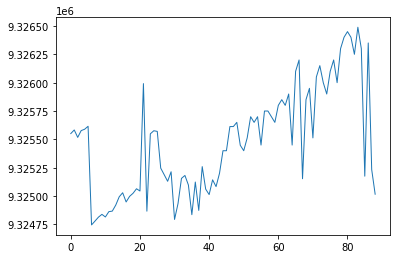

In [ ]:
collar_copy[ 'y'].plot()

In [ ]:
#vammos chamar nosso geodataframe de gdf

gdf = gpd.GeoDataFrame(collar_copy,
                       geometry = gpd.points_from_xy(
                                                      x = collar_copy['x'],
                                                      y = collar_copy['y']  
                                                     )
                      )
gdf.head()

,hole_id,Zone Utm,x,y,Elevation,Depth m,Dip,Azimute,geometry
0,DrillHole_0001,SIRGAS2000 - 24S,182038.41,9325551.30,243.89,87.91,-60,132,POINT (182038.410 9325551.300)
1,DrillHole_0002,SIRGAS2000 - 24S,182000.37,9325583.08,242.32,107.40,-60,132,POINT (182000.370 9325583.080)
2,DrillHole_0003,SIRGAS2000 - 24S,182001.47,9325517.67,239.31,87.11,-60,132,POINT (182001.470 9325517.670)
3,DrillHole_0004,SIRGAS2000 - 24S,181968.83,9325577.40,239.70,75.91,-60,132,POINT (181968.830 9325577.400)
4,DrillHole_0005,SIRGAS2000 - 24S,182058.91,9325589.29,248.35,98.54,-60,132,POINT (182058.910 9325589.290)


<AxesSubplot:>

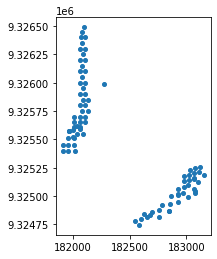

In [ ]:
gdf.plot()

In [ ]:
#verificando o crs
print(gdf.crs)

None


In [ ]:
#definindo o crs
gdf.set_crs('epsg:31984', inplace = True)
gdf.crs

<Projected CRS: EPSG:31984>
Name: SIRGAS 2000 / UTM zone 24S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 42°W and 36°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-42.0, -26.35, -36.0, 0.74)
Coordinate Operation:
- name: UTM zone 24S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
gdf.explore(tiles = "Stamen Terrain",
            color = '#232922',
            )

In [ ]:
gdf.head()

,hole_id,Zone Utm,x,y,Elevation,Depth m,Dip,Azimute,geometry
0,DrillHole_0001,SIRGAS2000 - 24S,182038.41,9325551.30,243.89,87.91,-60,132,POINT (182038.410 9325551.300)
1,DrillHole_0002,SIRGAS2000 - 24S,182000.37,9325583.08,242.32,107.40,-60,132,POINT (182000.370 9325583.080)
2,DrillHole_0003,SIRGAS2000 - 24S,182001.47,9325517.67,239.31,87.11,-60,132,POINT (182001.470 9325517.670)
3,DrillHole_0004,SIRGAS2000 - 24S,181968.83,9325577.40,239.70,75.91,-60,132,POINT (181968.830 9325577.400)
4,DrillHole_0005,SIRGAS2000 - 24S,182058.91,9325589.29,248.35,98.54,-60,132,POINT (182058.910 9325589.290)


Text(0.5, 0.98, 'Distribuição das Sondagens da OreExtraction')

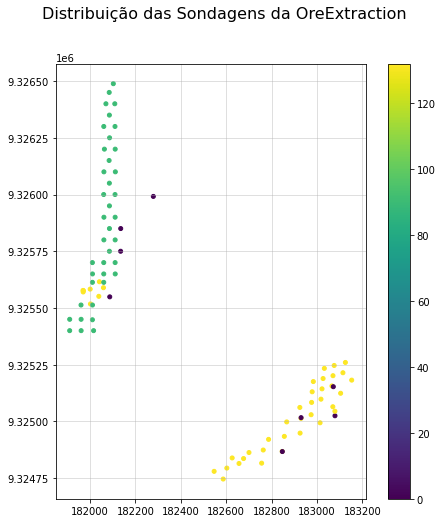

In [ ]:
#criando o plot

fig, axes = plt.subplots(figsize = (8,8))

#definindo para plotar
gdf.plot(column = 'Azimute',
         ax=axes,
         legend = True)

#colocando a grade de coordenadas
plt.grid(alpha = 0.5)

#definindo o título
fig.suptitle('Distribuição das Sondagens da OreExtraction', fontsize = 16)


#salvando a figura
#plt.savefig(path+'mapa_sondagens.jpeg', dpi=300);

# c) Perfil das Sondagens

Para essa parte de perfil de Sondagens, vamos utilizar Striplog. Uma biblioteca bem complexa, mas vamos pegar apenas a parte mais superficial - que é justamente plotar gráficos 2D das sondagens.

In [ ]:
geologia_copy = geology.copy()
geologia_copy.head()

,Hole Identificador,from_m,to_m,length_m,Lithology 1,Geology Description
0,DrillHole_0001,0.00,3.05,3.05,Solo Marrom,"Material Cascalhoso, por vezes, apresentando f..."
1,DrillHole_0001,3.05,4.70,1.65,Rocha Calcissilicatica Magnetica,Material de coloração laranja. Apresentando al...
2,DrillHole_0001,4.70,8.22,3.52,Rocha Calcissilicatica Magnetica,Rocha Calcissilicática. Apresenta carbonatação...
3,DrillHole_0001,8.22,11.60,3.38,Rocha Calcissilicatica Magnetica,Rocha de coloração preta contendo grande quant...
4,DrillHole_0001,11.60,14.86,3.26,Rocha Calcissilicatica Magnetica,Rocha Calcissilicática saprolitizada contendo ...


In [ ]:
#renomeando as colunas

geologia_copy.rename(columns = {'from_m':'top',
                                'to_m':'base',
                                'Lithology 1':'lithology',
                                'Hole Identificador':'hole_id'
                                }, 
                     inplace = True)

In [ ]:
geologia_copy.lithology.unique()

array(['Solo Marrom', 'Rocha Calcissilicatica Magnetica',
       'Rocha Calcissilicatica Nao Magnetica', 'Magnetito', 'Gnaisse',
       'Granito gnaissico', 'Solo Arenoso', 'Granito', 'Pegmatito',
       'Veio de Quartzo', 'DEST', 'Rocha Vulcanica'], dtype=object)

In [ ]:
my_csv = geologia_copy.to_csv()

In [ ]:
#criando um dicionário lexicon

#creating my Lexicon
lex_dict = {
    'lithology':['Solo Marrom',
                'Rocha Calcissilicatica Magnetica',
                'Rocha Calcissilicatica Nao Magnetica',
                'Magnetito',
                'Gnaisse',
                'Granito gnaissico',
                'Solo Arenoso',
                'Granito',
                'Pegmatito',
                'Veio de Quartzo',
                'DEST',
                'Rocha Vulcanica'
    ],
    
                                          
    'synonyms': {'Solo Marrom':['SOLM'],
                 'Rocha Calcissilicatica Magnetica':['RCSM'],
                 'Veio de Quartzo':['VQ'],
                 'Rocha Calcissilicatica Nao Magnetica': ['RCNM'],
                 'Magnetito': ['MAG'],
                 'Solo Arenoso':['SOLO'],
                 'Granito':['GRA'],
                 'Gnaisse':['GNS'],
                 'Rocha Vulcanica':['VUC'],
                 'Pegmatito':['PEG'],
                 'DEST':['DEST']
                 
                 
    },
    'parts_of_speech': {'noun':['lithology']}
        }
    
my_lexicon = Lexicon(lex_dict)

In [ ]:
#definindo a legenda

my_legend_csv = """colour,hatch,comp lithology
#fff6d9,…,Solo Arenoso
#dd2972,,Granito
#ccb7ff,,Gnaisse
#ff00fb,,Magnetito
#ae55e6,,Rocha Vulcanica
#f8edff,,Veio de Quartzo
#c4bfb3,t,Rocha Calcissilicatica Magnetica
#c49d58,,Rocha Calcissilicatica Nao Magnetica
#665c49,,Solo Marrom
#f2b830,.,Pegmatito



"""
my_legend = Legend.from_csv(text=my_legend_csv)

In [ ]:
my_legend

Legend(Decor({'_colour': '#fff6d9', 'hatch': '…', 'component': Component({'lithology': 'solo arenoso'}), 'width': None})
Decor({'_colour': '#dd2972', 'component': Component({'lithology': 'granito'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ccb7ff', 'component': Component({'lithology': 'gnaisse'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ff00fb', 'component': Component({'lithology': 'magnetito'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ae55e6', 'component': Component({'lithology': 'rocha vulcanica'}), 'width': None, 'hatch': None})
Decor({'_colour': '#f8edff', 'component': Component({'lithology': 'veio de quartzo'}), 'width': None, 'hatch': None})
Decor({'_colour': '#c4bfb3', 'hatch': 't', 'component': Component({'lithology': 'rocha calcissilicatica magnetica'}), 'width': None})
Decor({'_colour': '#c49d58', 'component': Component({'lithology': 'rocha calcissilicatica nao magnetica'}), 'width': None, 'hatch': None})
Decor({'_colour': '#665c49', 'component': Component({'lithology': 'solo marrom'}), 'width': None, 'hatch': None})
Decor({'_colour': '#f2b830', 'hatch': '.', 'component': Component({'lithology': 'pegmatito'}), 'width': None}))

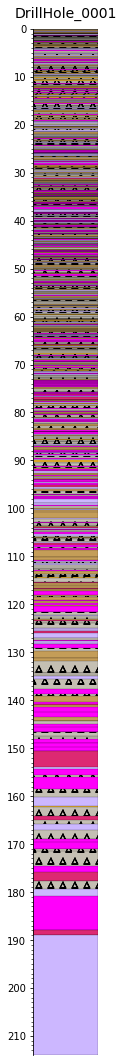

In [ ]:
striplog = Striplog.from_csv(text=my_csv, lexicon=my_lexicon)

for iv in striplog:
    iv.components = [Component({'lithology': iv.data['lithology']})]
    iv.data = {'hole_id': iv.data['hole_id']}
    
striplog.plot(legend = my_legend,
              aspect = 10,
              lw = 0.2,
              #label = 'lithology',
              ladder = True)

plt.title('DrillHole_0001',
          loc = 'center',
          fontdict = {'fontsize':14},
          y = 1.005
        );


#plt.savefig('test.jpeg',bbox_inches="tight")

In [ ]:
striplog[0]

Interval({'top': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}), 'base': Position({'middle': 3.05, 'units': 'm'}), 'description': '', 'data': {'hole_id': 'DrillHole_0001'}, 'components': [Component({'lithology': 'Solo Marrom'})]})

Para fazer depois: crie uma looping com if-else em que cada litologia receba uma sigla e depois rode o código abaixo para poder gerar perfis para todos os poços.


```python
holes = list(df.Hole_ID.unique())

for hole in holes:
    drill_hole = df[df['Hole_ID'] == hole]
    csv_text = drill_hole.to_csv()
    striplog = Striplog.from_csv(text=csv_text, lexicon=my_lexicon)

    for iv in striplog:
        iv.components = [Component({'lithology': iv.data['lithology']})]
        iv.data = {'hole_id': iv.data['hole_id']}
    
    striplog.plot(legend = my_legend,
                  aspect = 10,
                  lw = 0.2,
                  label = 'lithology'
                 )

    plt.title(hole,
              loc = 'center',
              fontdict = {'fontsize':14},
              y = 1.01
             );
``` 

# d) Análise Estrutural

In [ ]:
import mplstereonet as mpl

In [ ]:
collar_copy.head()

,hole_id,Zone Utm,x,y,Elevation,Depth m,Dip,Azimute,geometry
0,DrillHole_0001,SIRGAS2000 - 24S,182038.41,9325551.30,243.89,87.91,-60,132,POINT (182038.410 9325551.300)
1,DrillHole_0002,SIRGAS2000 - 24S,182000.37,9325583.08,242.32,107.40,-60,132,POINT (182000.370 9325583.080)
2,DrillHole_0003,SIRGAS2000 - 24S,182001.47,9325517.67,239.31,87.11,-60,132,POINT (182001.470 9325517.670)
3,DrillHole_0004,SIRGAS2000 - 24S,181968.83,9325577.40,239.70,75.91,-60,132,POINT (181968.830 9325577.400)
4,DrillHole_0005,SIRGAS2000 - 24S,182058.91,9325589.29,248.35,98.54,-60,132,POINT (182058.910 9325589.290)


In [ ]:
estrutural = collar_copy.groupby('hole_id')['Dip','Azimute'].mean().reset_index()
estrutural.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,hole_id,Dip,Azimute
0,DrillHole_0001,-60.0,132.0
1,DrillHole_0002,-60.0,132.0
2,DrillHole_0003,-60.0,132.0
3,DrillHole_0004,-60.0,132.0
4,DrillHole_0005,-60.0,132.0


In [ ]:
for i in estrutural.iterrows():
  print(i[1][1], i[1][2])

-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-90.0 0.0
-60.0 132.0
-60.0 132.0
-90.0 0.0
-90.0 0.0
-90.0 0.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 132.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-90.0 0.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-90.0 0.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-90.0 0.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 90.0
-60.0 132.0
-60.0 90.0
-60.0 132

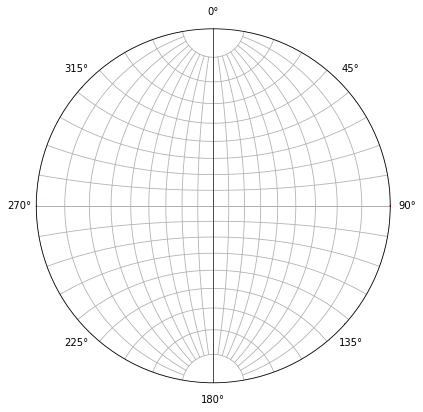

In [ ]:
#plotando as atitudes poço


strike = estrutural["Azimute"]
dip = estrutural["Dip"]

fig = plt.figure(figsize=(5, 5), constrained_layout=True)

ax = fig.add_subplot(111, projection="equal_angle_stereonet")

ax.plane(strike, dip, c="red", linewidth=0.5)

ax.grid()

plt.show()

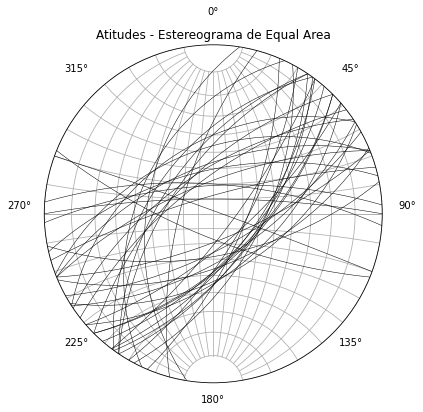

In [ ]:
#Exemplo Kevin
data = pd.read_csv(path+"data_estructural.csv")

strike = data["direccion"]
dip = data["buzamiento"]

fig = plt.figure(figsize=(5, 5), constrained_layout=True)

ax = fig.add_subplot(111, projection="equal_angle_stereonet")

ax.plane(strike, dip, c="black", linewidth=0.5)

ax.grid()

plt.title('Atitudes - Estereograma de Equal Area');
plt.show()

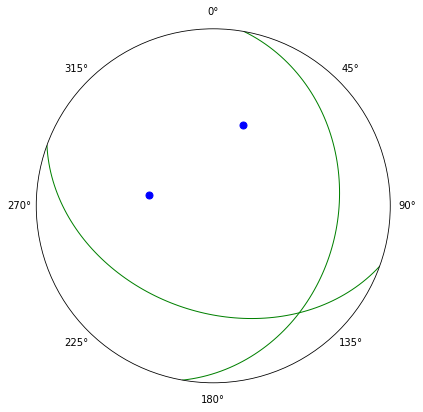

In [ ]:
#Plano de Corte
dip_directions = [100, 200]
dips = [30, 40]

# Restando 90 al dip direction
strikes = np.array(dip_directions) - 90

fig, ax = mpl.subplots(figsize=(5, 5), constrained_layout=True)

ax.pole(strikes, dips, color="blue", ms=7)
ax.plane(strikes, dips, color="green", lw=1)

plt.show()

In [ ]:
fit_strike, fit_dip = mpl.fit_girdle(strikes, dips)

In [ ]:
print(f"Plano de corte\Rumo: {fit_strike:.1f}\Mergulho: {fit_dip:.1f}")

Plano de corte\Rumo: 231.2\Mergulho: 66.5


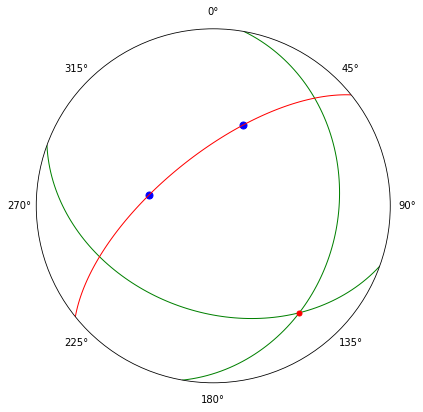

In [ ]:
fig, ax = mpl.subplots(figsize=(5, 5), constrained_layout=True)

ax.pole(strikes, dips, color="blue", ms=7)
ax.plane(strikes, dips, color="green", lw=1)

ax.plane(fit_strike, fit_dip, color="red", lw=1)
ax.pole(fit_strike, fit_dip, marker="o", color="red", ms=5)

plt.show()

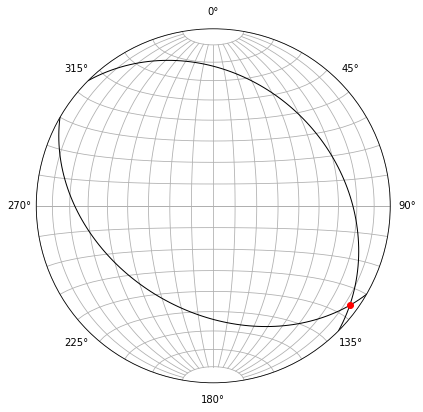

In [ ]:
## Interseção de Planos

strike1, dip1 = 315, 30
strike2, dip2 = 120, 40

plunge, bearing = mpl.plane_intersection(strike1, dip1, strike2, dip2)

fig, ax = mpl.subplots(figsize=(5, 5), constrained_layout=True)

ax.plane(strike1, dip1, c="black", linewidth=1)
ax.plane(strike2, dip2, c="black", linewidth=1)

ax.line(plunge, bearing, marker=".", color="red", ms=12)

ax.grid() 

plt.show()

# e) Plotando dados Geoquímicos



In [ ]:
assay_copy = assay.copy()
assay_copy.head()

,sample_id,hole_id,depth_from,depth_to,litho_reclass,SiO2_pct,TiO2_pct,Al2O3_pct,Cr2O3_pct,Fe_pct,...,Pb_pct,S_pct,Sn_pct,Sr_pct,V_pct,Zn_pct,Zr_pct,total_pct,FeO_pct,mag_pct
0,AMOSTRA_1001,NaN,NaN,NaN,NaN,97.4,0.03,0.09,0.004,0.62,...,NaN,0.003,0.0001,0.001,0.001,NaN,NaN,98.53,0.72,1.34
1,AMOSTRA_1002,NaN,NaN,NaN,NaN,54.2,0.02,0.49,NaN,30.18,...,0.003,NaN,0.0001,NaN,0.002,0.003,0.002,100.40,1.39,NaN
2,AMOSTRA_1003,DrillHole_0005,0.00,1.50,NaN,56.8,0.20,6.66,0.009,20.28,...,NaN,0.005,0.0001,0.003,0.003,0.012,0.007,100.10,2.36,6.15
3,AMOSTRA_1004,DrillHole_0005,1.50,2.75,Rocha Calcissilicatica Nao Magnetitoetica,47.5,0.88,13.25,0.037,9.15,...,0.004,0.010,0.0001,0.019,0.010,0.023,0.027,100.10,0.79,0.63
4,AMOSTRA_1005,DrillHole_0005,2.75,4.00,Rocha Calcissilicatica Nao Magnetitoetica,63.1,0.36,4.99,0.020,11.32,...,0.008,0.012,0.0010,0.010,0.006,0.021,0.011,100.60,2.33,1.16


In [ ]:
assay_copy.columns

Index(['sample_id', 'hole_id', 'depth_from', 'depth_to', 'litho_reclass',
       'SiO2_pct', 'TiO2_pct', 'Al2O3_pct', 'Cr2O3_pct', 'Fe_pct', 'Mn_pct',
       'CaO_pct', 'MgO_pct', 'Na2O_pct', 'K2O_pct', 'BaO_pct', 'P_pct',
       'loi_pct', 'As_pct', 'Cl_pct', 'Co_pct', 'Cu_pct', 'Ni_pct', 'Pb_pct',
       'S_pct', 'Sn_pct', 'Sr_pct', 'V_pct', 'Zn_pct', 'Zr_pct', 'total_pct',
       'FeO_pct', 'mag_pct'],
      dtype='object')

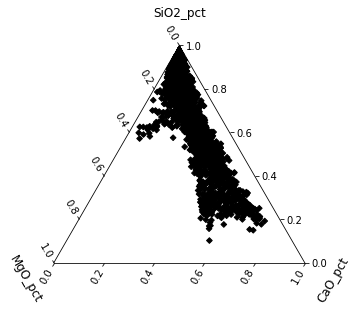

In [ ]:
ax = assay_copy.loc[:, ["SiO2_pct", "MgO_pct", "CaO_pct"]].pyroplot.scatter(c="k")
plt.show()
#podemos ver que as sondagens tem maior concentração do lado Silicoso de CaO
#fazendo jus à grande quantidade de rochas calcissilicaticas

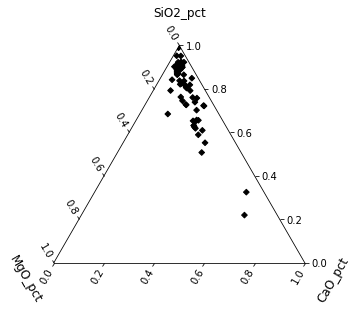

In [ ]:
am = assay_copy[assay_copy['hole_id'] == 'DrillHole_0001']
ax = am.loc[:, ["SiO2_pct", "MgO_pct", "CaO_pct"]].pyroplot.scatter(c="k")
plt.show()


### Como fazer um looping para gerar gráficos para cada Sondagem?

# f) Visualização em 3D (extra)

## Vamos fazer juntos...

Nombres de las columnas:

Para collar las columnas deben tener los nombres: ID, X, Y, Z.

Para survey las columnas deben tener los nombres: ID, AT, AZ, DIP

Para table las columnas deben tener los nombres: ID, FROM, TO, y cualquier otra columna con valores categóricos o numéricos

In [ ]:
collar_file = collar_copy
survey_file = geologia_copy
table_file = assay.copy()

table_name = geologia_copy

data = DrillData(collar=collar_file,
                 survey=survey_file,
                 table=table_file,
                 table_name=table_name)

In [ ]:
data.validate()